In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/train_CloudCondition.csv")
df.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,3,Partly Cloudy,rain,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,4,Partly Cloudy,snow,30,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,5,Partly Cloudy,snow,27,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


In [4]:
df1=pd.read_csv("/content/drive/MyDrive/test_CloudCondition.csv")
df1.head()

,Day,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,80002,rain,1.0,0.0,0.078150,17.0,300,10.0,1029.0,Fog,1399
1,80003,rain,-3.0,25.0,0.653251,25.0,322,0.0,1009.0,Dry,1468
2,80004,rain,18.0,17.0,0.930970,37.0,330,12.0,1045.0,Dry,1152
3,80005,rain,33.0,-12.0,0.778844,50.0,350,3.0,1022.0,Fog,1003
4,80006,rain,25.0,-19.0,0.491523,62.0,300,12.0,1042.0,Fog,1228


In [5]:
df1.shape

(16452, 11)

In [6]:
df.shape

(71428, 12)

In [7]:
df.isnull().sum()

Day                             0
Cloud_Condition                 0
Rain_OR_SNOW                  115
Temperature (C)               252
Apparent Temperature (C)        3
Humidity                        1
Wind Speed (km/h)               2
Wind Bearing (degrees)         37
Visibility (km)                20
Pressure (millibars)           65
Condensation                    0
Solar irradiance intensity      0
dtype: int64

In [8]:
df.describe()

,Day,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
count,71428.000000,71425.000000,71427.000000,71426.000000,71391.000000,71408.000000,71363.000000,71428.000000
mean,37170.170451,5.550606,0.501020,31.525831,179.221793,8.014606,1022.980606,1249.736546
std,22250.741209,19.093822,0.289431,18.507098,103.729210,4.907893,13.559828,144.828721
min,1.000000,-27.000000,0.000019,0.000000,0.000000,0.000000,1000.000000,1000.000000
25%,18275.750000,-11.000000,0.249233,16.000000,89.000000,4.000000,1011.000000,1124.000000
50%,36132.500000,5.000000,0.501461,31.000000,180.000000,8.000000,1023.000000,1249.000000
75%,53989.250000,22.000000,0.751978,48.000000,269.000000,12.000000,1035.000000,1375.000000
max,80000.000000,38.000000,0.999990,63.000000,359.000000,16.000000,1046.000000,1500.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71428 entries, 0 to 71427
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         71428 non-null  int64  
 1   Cloud_Condition             71428 non-null  object 
 2   Rain_OR_SNOW                71313 non-null  object 
 3   Temperature (C)             71176 non-null  object 
 4   Apparent Temperature (C)    71425 non-null  float64
 5   Humidity                    71427 non-null  float64
 6   Wind Speed (km/h)           71426 non-null  float64
 7   Wind Bearing (degrees)      71391 non-null  float64
 8   Visibility (km)             71408 non-null  float64
 9   Pressure (millibars)        71363 non-null  float64
 10  Condensation                71428 non-null  object 
 11  Solar irradiance intensity  71428 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 6.5+ MB


## ***Lets see all the categorical variables in our dataset ?***

In [10]:
data=df.select_dtypes(object)

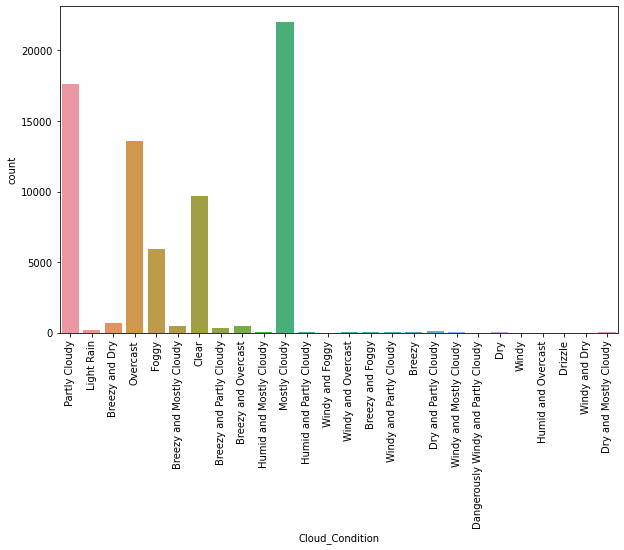

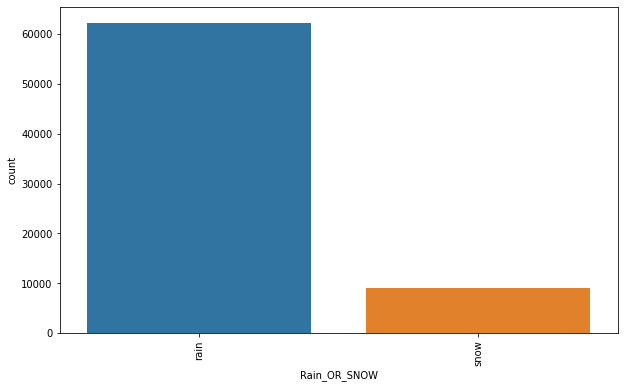

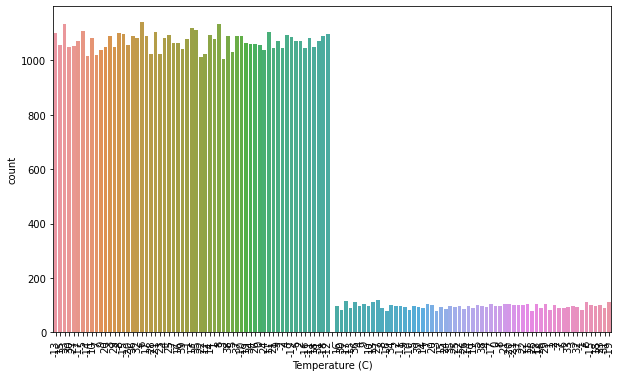

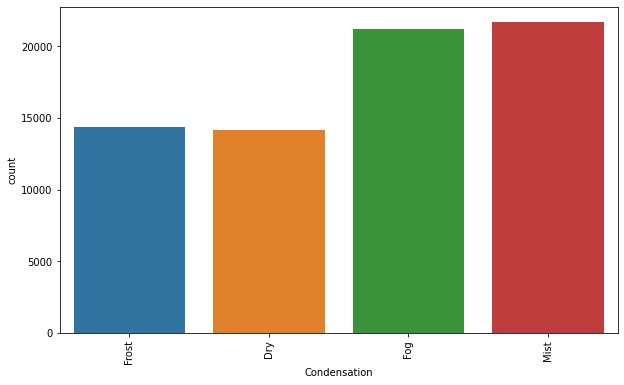

In [11]:
for columns in data.columns:
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=90)
    sns.countplot(data[columns])
    plt.show()

# ***Obseravation:***
##                  1- AS shown in diagram Rain condition is higher than snow and because of these rainy cloud condition is comparatively high.
 

# **Lets see all the numerical variable in dataset ?**

In [12]:
float_data=df.select_dtypes(float)

In [13]:
float_data.columns

Index(['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

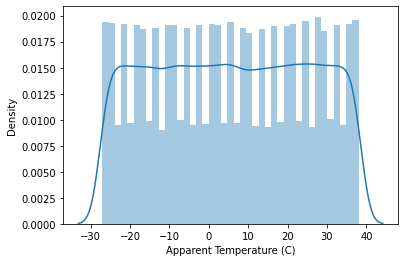

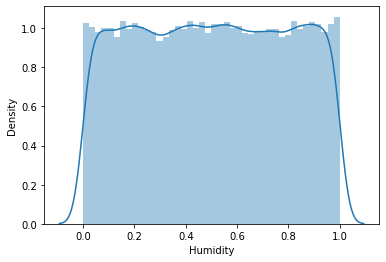

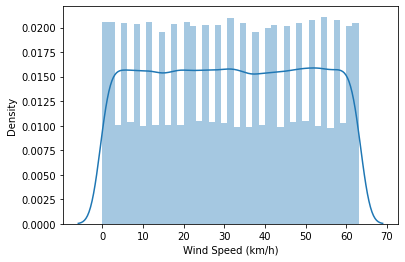

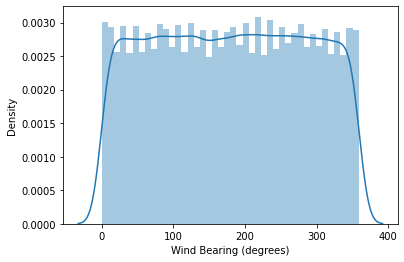

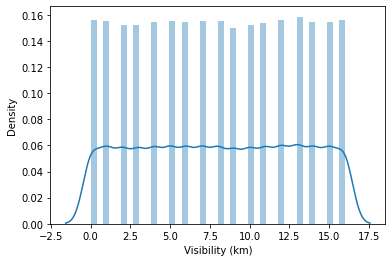

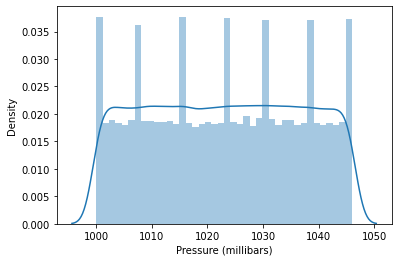

In [14]:
for columns in float_data.columns:
    sns.distplot(float_data[columns])
    plt.show()

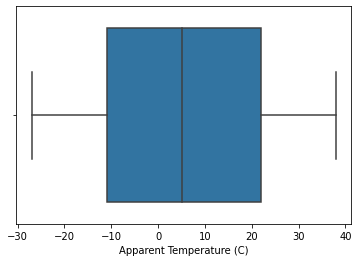

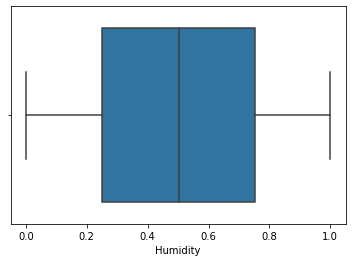

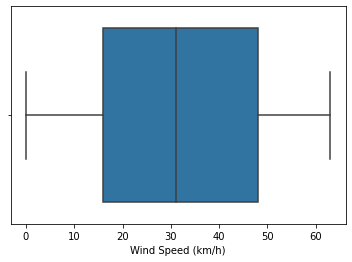

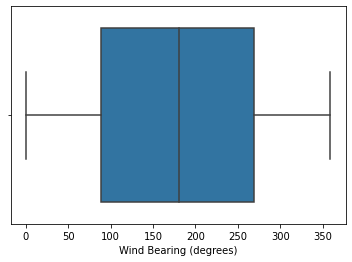

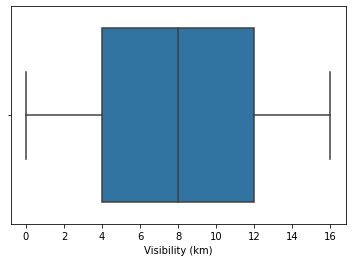

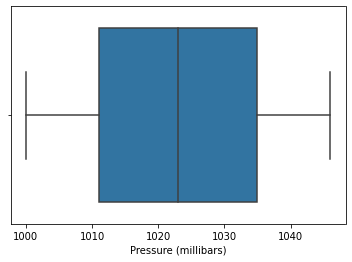

In [15]:
for columns in float_data.columns:
    sns.boxplot(float_data[columns])
    plt.show()

In [16]:
int_data=df.select_dtypes(int)

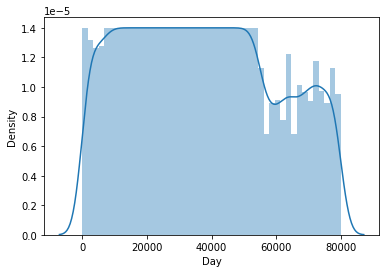

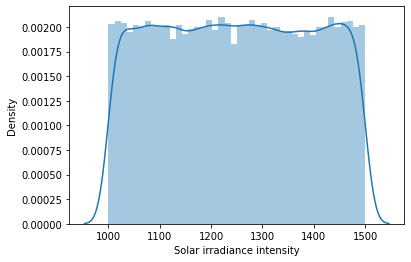

In [17]:
for columns in int_data.columns:
    sns.distplot(int_data[columns])
    plt.show()

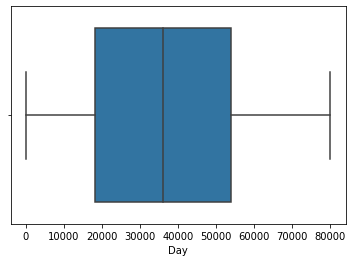

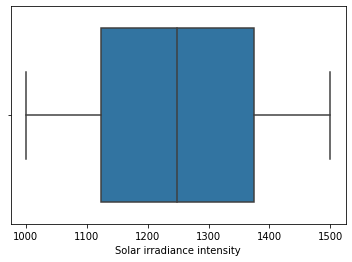

In [18]:
for columns in int_data.columns:
    sns.boxplot(int_data[columns])
    plt.show()

# **Biavarient analysis**

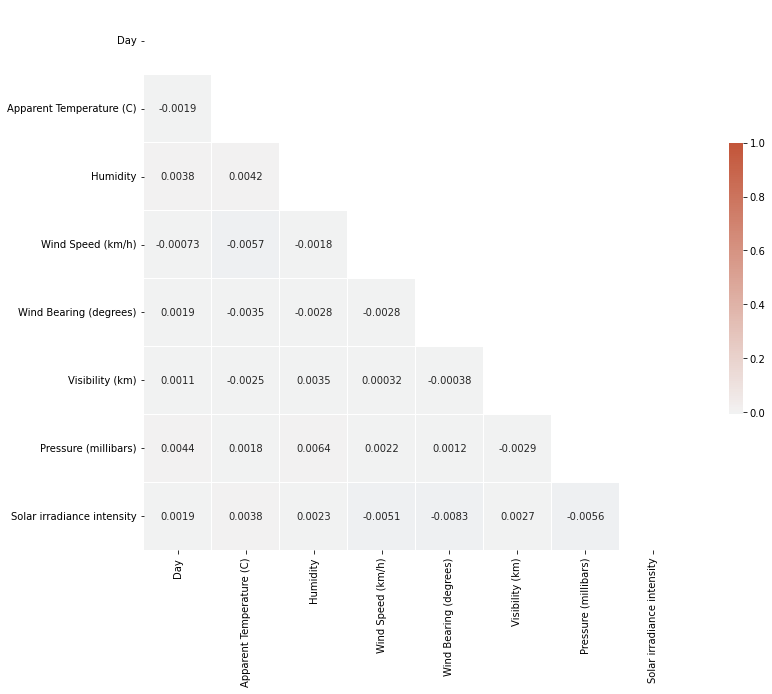

In [19]:
f, ax = plt.subplots(figsize=(15, 10))
mat = df.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [20]:
# There is no correlation between each dependent variable.

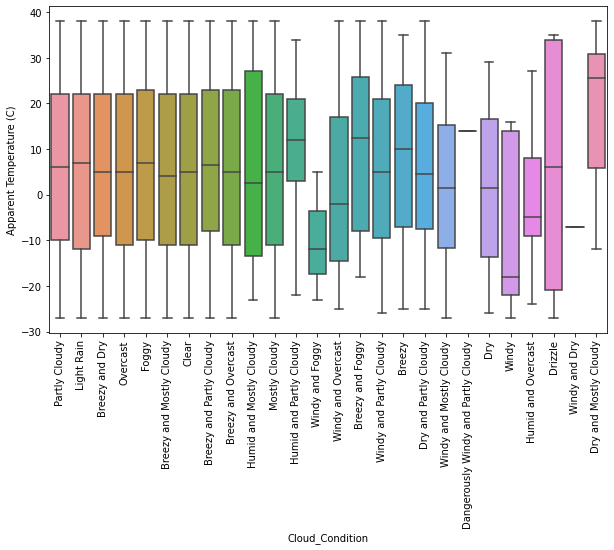

In [21]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(df["Cloud_Condition"],df["Apparent Temperature (C)"])

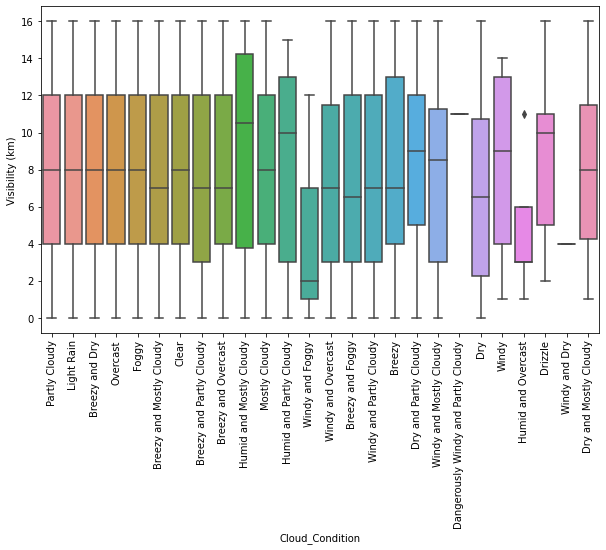

In [22]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(df["Cloud_Condition"],df["Visibility (km)"])

# **handle null values**

Text(0.5, 1.0, 'Feature containig NAN')

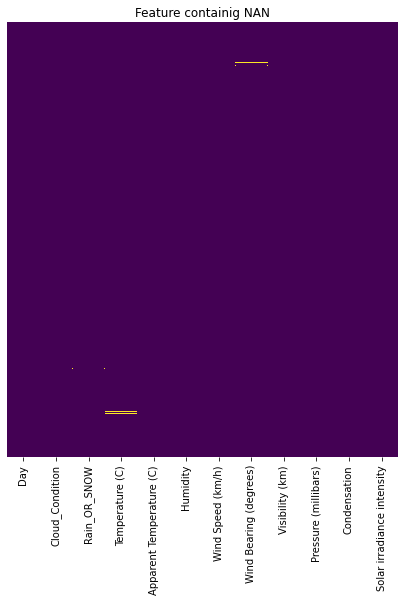

In [23]:
plt.figure(figsize=(7,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.title("Feature containig NAN")

In [24]:
df.isnull().sum()

Day                             0
Cloud_Condition                 0
Rain_OR_SNOW                  115
Temperature (C)               252
Apparent Temperature (C)        3
Humidity                        1
Wind Speed (km/h)               2
Wind Bearing (degrees)         37
Visibility (km)                20
Pressure (millibars)           65
Condensation                    0
Solar irradiance intensity      0
dtype: int64

In [25]:
df.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,3,Partly Cloudy,rain,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,4,Partly Cloudy,snow,30,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,5,Partly Cloudy,snow,27,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


In [26]:
df["Rain_OR_SNOW"]=df["Rain_OR_SNOW"].map({"rain":1,"snow":0})

In [27]:
df["Rain_OR_SNOW"].unique()

array([ 1.,  0., nan])

In [28]:
df["Rain_OR_SNOW"]=df["Rain_OR_SNOW"].fillna(df["Rain_OR_SNOW"].mode()[0])

In [29]:
df["Pressure (millibars)"].median()

1023.0

In [30]:
df["Wind Speed (km/h)"]=df["Wind Speed (km/h)"].fillna(df["Wind Speed (km/h)"].mean())

In [31]:
df["Humidity"]=df["Humidity"].fillna(df["Humidity"].mean())

In [32]:
df["Wind Bearing (degrees)"]=df["Wind Bearing (degrees)"].fillna(df["Wind Bearing (degrees)"].mean())

In [33]:
df["Visibility (km)"]=df["Visibility (km)"].fillna(df["Visibility (km)"].median())

In [34]:
df["Pressure (millibars)"]=df["Pressure (millibars)"].fillna(df["Pressure (millibars)"].median())

In [35]:
 df["Temperature (C)"]=df["Temperature (C)"].replace("-",0)

In [36]:
 df["Temperature (C)"]=df["Temperature (C)"].fillna(method="pad")

In [37]:
df["Temperature (C)"] = df["Temperature (C)"].astype(str).astype(int)

In [38]:
 df["Apparent Temperature (C)"]=df["Apparent Temperature (C)"].fillna(method="pad")

In [39]:
df.isnull().sum()

Day                           0
Cloud_Condition               0
Rain_OR_SNOW                  0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Condensation                  0
Solar irradiance intensity    0
dtype: int64

In [40]:
df.dtypes

Day                             int64
Cloud_Condition                object
Rain_OR_SNOW                  float64
Temperature (C)                 int64
Apparent Temperature (C)      float64
Humidity                      float64
Wind Speed (km/h)             float64
Wind Bearing (degrees)        float64
Visibility (km)               float64
Pressure (millibars)          float64
Condensation                   object
Solar irradiance intensity      int64
dtype: object

In [41]:
df=pd.get_dummies(df,columns=["Condensation"],drop_first=True)

In [42]:
df.dtypes

Day                             int64
Cloud_Condition                object
Rain_OR_SNOW                  float64
Temperature (C)                 int64
Apparent Temperature (C)      float64
Humidity                      float64
Wind Speed (km/h)             float64
Wind Bearing (degrees)        float64
Visibility (km)               float64
Pressure (millibars)          float64
Solar irradiance intensity      int64
Condensation_Fog                uint8
Condensation_Frost              uint8
Condensation_Mist               uint8
dtype: object

In [43]:
df.shape

(71428, 14)

In [44]:
df.dtypes

Day                             int64
Cloud_Condition                object
Rain_OR_SNOW                  float64
Temperature (C)                 int64
Apparent Temperature (C)      float64
Humidity                      float64
Wind Speed (km/h)             float64
Wind Bearing (degrees)        float64
Visibility (km)               float64
Pressure (millibars)          float64
Solar irradiance intensity      int64
Condensation_Fog                uint8
Condensation_Frost              uint8
Condensation_Mist               uint8
dtype: object

In [45]:
df1.dtypes

Day                             int64
Rain_OR_SNOW                   object
Temperature (C)               float64
Apparent Temperature (C)      float64
Humidity                      float64
Wind Speed (km/h)             float64
Wind Bearing (degrees)          int64
Visibility (km)               float64
Pressure (millibars)          float64
Condensation                   object
Solar irradiance intensity      int64
dtype: object

In [46]:
df1=pd.get_dummies(df1,columns=["Condensation"],drop_first=True)

In [47]:
df1["Rain_OR_SNOW"]=df1["Rain_OR_SNOW"].map({"rain":1,"snow":0})

In [48]:
day=df1["Day"]

In [49]:
df=df.drop(["Day"],axis=1)

In [50]:
df.head()

,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity,Condensation_Fog,Condensation_Frost,Condensation_Mist
0,Partly Cloudy,1.0,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,1068,0,1,0
1,Partly Cloudy,1.0,15,5.0,0.847434,8.0,291.0,2.0,1036.0,1291,0,1,0
2,Partly Cloudy,1.0,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,1433,0,0,0
3,Partly Cloudy,0.0,30,36.0,0.255069,15.0,130.0,3.0,1016.0,1410,0,0,0
4,Partly Cloudy,0.0,27,30.0,0.495435,63.0,60.0,15.0,1007.0,1391,1,0,0


In [51]:
df1=df1.drop(["Day"],axis=1)

In [52]:
x=df.drop(["Cloud_Condition"],axis=1)
y=df["Cloud_Condition"]

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [54]:
x_train_scale=scaler.fit_transform(x)
y_test_scale=scaler.transform(df1)

In [55]:
x_train_scale.shape

(71428, 12)

In [56]:
y_test_scale.shape

(16452, 12)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
X_train,X_val,y_train,y_val = train_test_split(x_train_scale,y,test_size = 0.2,random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model=LogisticRegression()

In [61]:
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_pred=model.predict(X_val)

In [63]:
print(accuracy_score(y_val,y_pred))

0.3223435531289374


In [64]:
final_pred = model.predict(y_test_scale)
submission = pd.DataFrame({
    "Day": day,
    "Cloud_Condition": final_pred
})

In [65]:
submission.shape

(16452, 2)

In [66]:
df1.shape

(16452, 12)

In [67]:
submission.to_csv("submission1.csv", index = False)